In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from fbm import utils
from fbm.sim import davies_harte

$$\sigma_t = \exp \left\{ \nu dW^{H}_t - \alpha(X_t - m)dt \right\} ,\; t\in [0, T]$$

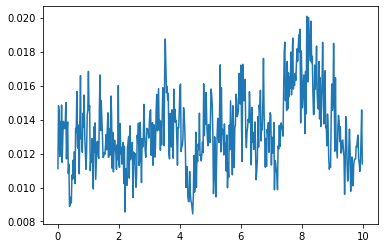

In [32]:
H = 0.1
v = 0.3
X0 = m = -4.5
alpha = 5e-4
T = 10
spacing = 50

fBm = davies_harte.DaviesHarteFBmGenerator()
fBm_path = fBm.generate_fGn(H, T*spacing) / spacing**H
X = np.ndarray(T*spacing)
X[0] = X0
for i in range(1, len(X)):
    X[i] = X[i-1] + v*fBm_path[i-1] - alpha * (X[i-1] - m) / spacing

plt.plot(np.arange(T*spacing) / spacing, np.exp(X))
plt.show()

$$\frac{dS_t}{S_t} = \mu_tdt + \sigma_tdZ_t$$
$$\sigma_t = \exp \left\{ X_t \right\} ,\; t\in [0, T]$$
$$dX_t =  \nu dW^{H}_t - \alpha(X_t - m)dt$$
- $Z$ and $W^{H}$ are correlated ($corr(Z_{1}, W^{H}_{1}) = \rho$)

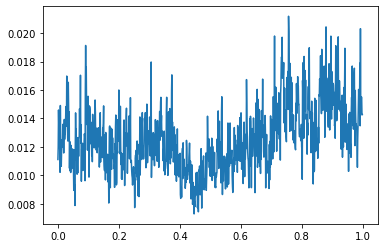

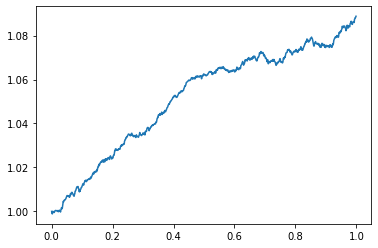

In [31]:
H = 0.1
v = 0.3
X0 = m = -4.5
mu = 0.08
S0 = 1
alpha = 5e-4
T = 1
spacing = 1000
rho = -0.6

bfBm = davies_harte.DaviesHarteBiFBmGenerator()
bfBm_paths = bfBm.generate_bifGn(H1=H, H2=0.5, rho=rho, size=T*spacing)

dwh = bfBm_paths[0] / spacing**H
dz = bfBm_paths[1] / spacing**0.5

S = np.ndarray(T*spacing)
X = np.ndarray(T*spacing)
S[0] = S0
X[0] = X0

for i in range(1, len(X)):
    X[i] = X[i-1] + v*dwh[i-1] - alpha * (X[i-1] - m) / spacing
    sigma = np.exp(X[i-1])
    S[i] = S[i-1] * mu / spacing + S[i-1] * sigma * dz[i-1] + S[i-1]

plt.plot(np.arange(T*spacing)/spacing, np.exp(X))
plt.show()

plt.plot(np.arange(T*spacing)/spacing, S)
plt.show()